# What sells a car?

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import missingno as msno 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly
import plotly.express as px
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df = pd.read_csv('vehicles_us.csv')

### Explore initial data

In [3]:
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Checking for missing values

In [6]:
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2))
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  
print ("#"*40,"\n","\n\n")

######################################## 
Missing values :

 is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64
######################################## 
Percent of missing :

 price            0.00
model_year       7.02
model            0.00
condition        0.00
cylinders       10.21
fuel             0.00
odometer        15.32
transmission     0.00
type             0.00
paint_color     17.99
is_4wd          50.37
date_posted      0.00
days_listed      0.00
dtype: float64
######################################## 
Unique values :  

 price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color   

<Figure size 1440x720 with 0 Axes>

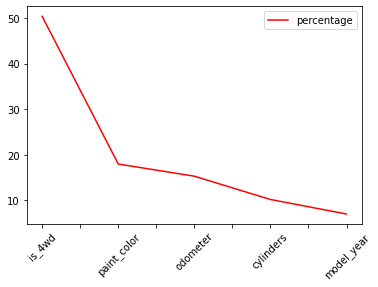

<AxesSubplot:>

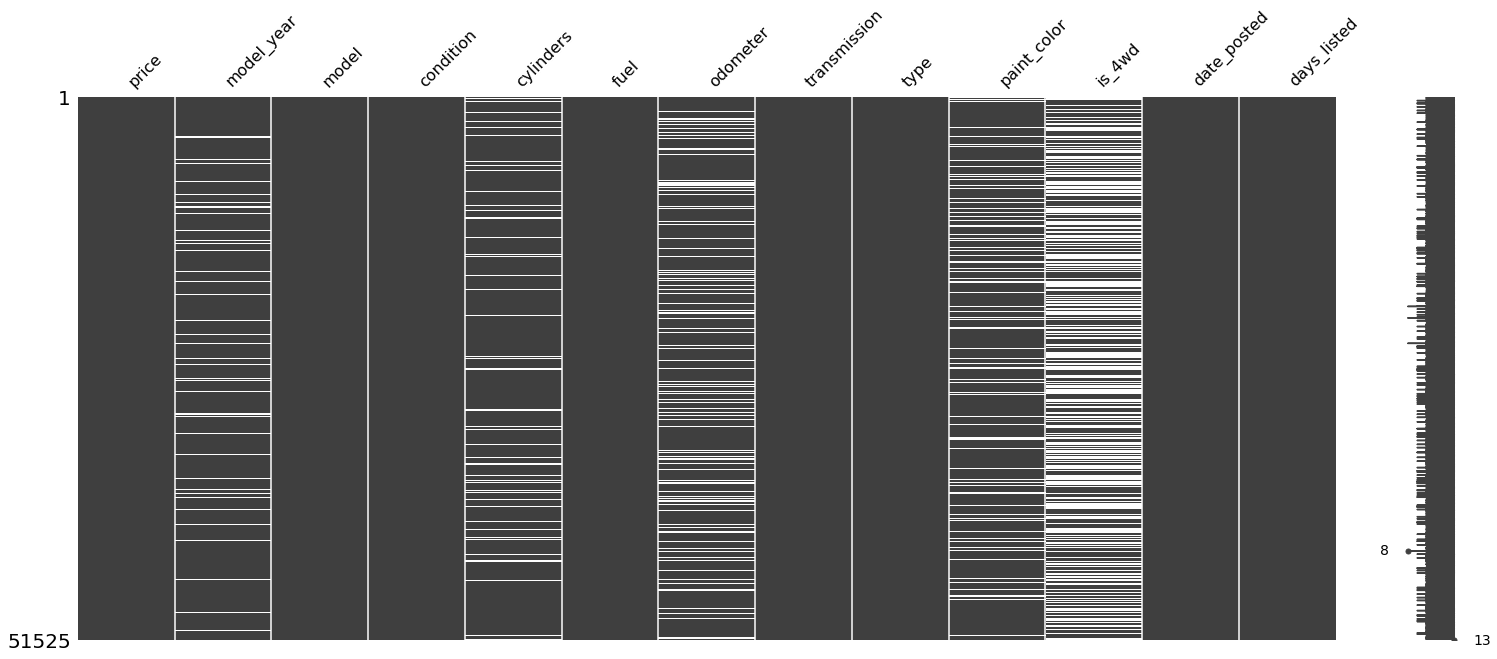

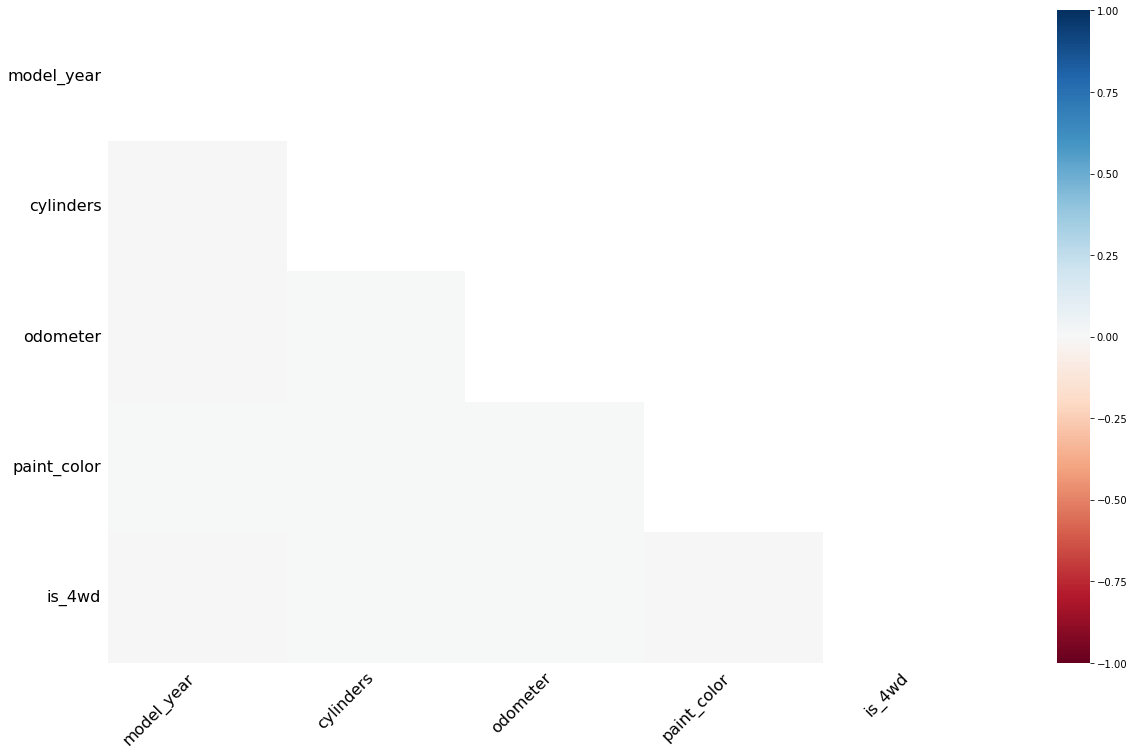

In [7]:
feature = []
percentage = []
for i in df.columns:
    miss_per = (df[i].isna().sum()/len(df[i]))*100
    if miss_per > 0:    
        feature.append(i)
        percentage.append(miss_per)
        
miss_df = pd.DataFrame(data=percentage, index=feature, columns=['percentage'])
plt.figure(figsize=(20,10))
ax = miss_df.sort_values(by='percentage', ascending=False).plot(color='red')
plt.xticks(rotation=45)
plt.show()
msno.matrix(df)
msno.heatmap(df)

## Treat missing values

In [8]:
df_null_num = df[(df['model_year'].isna()) & (df['cylinders'].isna()) & (df['odometer'].isna()) & (df['paint_color'].isna()) & (df['is_4wd'].isna())]
df_null_num

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,NaN,2018-10-16,44
20969,3000,NaN,ford focus,like new,NaN,diesel,NaN,automatic,sedan,NaN,NaN,2018-10-24,15
23376,3500,NaN,toyota 4runner,excellent,NaN,gas,NaN,automatic,SUV,NaN,NaN,2019-03-28,57
43039,4200,NaN,ford fusion,excellent,NaN,gas,NaN,automatic,sedan,NaN,NaN,2019-01-10,11


In [9]:
df_null_cat = df[(df['paint_color'].isna())]
df_null_cat

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [10]:
#treating is_4wd missing values
df['is_4wd'] = df['is_4wd'].fillna(0)

In [11]:
#treating paint_color missing values
df['paint_color'] = df['paint_color'].fillna('unknown')

In [12]:
#revised method in filling in the values
cylinder_medn = df.groupby('model')['cylinders'].transform('median')
df['cylinders'] = df['cylinders'].fillna(cylinder_medn)

In [13]:
odometer_medn = df.groupby('condition')['odometer'].transform('median')
df['odometer'] = df['odometer'].fillna(odometer_medn)

In [14]:
#revised method in filling in the values
myr_medn = df.groupby('model')['model_year'].transform('median')
df['model_year'] = df['model_year'].fillna(myr_medn)

In [15]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Fix data types

In [16]:
#checking datatypes
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [17]:
#converting object data type to category data type
df["fuel"] = df["fuel"].astype("category")
df["transmission"] = df["transmission"].astype("category")
df["type"] = df["type"].astype("category")
df["paint_color"] = df["paint_color"].astype("category")
df["condition"] = df["condition"].astype("category")
df["model"] = df["model"].astype("category")

#converting float into int
df["model_year"] = df["model_year"].astype(int, errors='ignore')
df["cylinders"]=df["cylinders"].astype(int, errors='ignore')
df["odometer"]=df["odometer"].astype(int, errors='ignore')
df["is_4wd"]=df["is_4wd"].astype(bool, errors='ignore')

#converting date to datetime
df["date_posted"] = pd.to_datetime(df["date_posted"],format='%Y-%m-%d')

In [18]:
#checking new data types
df.dtypes

price                    int64
model_year               int32
model                 category
condition             category
cylinders                int32
fuel                  category
odometer                 int32
transmission          category
type                  category
paint_color           category
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [19]:
#checking if names or labels are correct
print ("#"*40,"\n","Model : \n\n", df.model.unique())
print ("#"*40,"\n","Condition : \n\n", df.condition.unique())
print ("#"*40,"\n","Fuel : \n\n", df.fuel.unique())
print ("#"*40,"\n","Transmission : \n\n", df.transmission.unique())
print ("#"*40,"\n","Type : \n\n", df.type.unique())
print ("#"*40,"\n","Paint Color : \n\n", df.paint_color.unique())

######################################## 
 Model : 

 ['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200', 'chrysler 300', ..., 'dodge dakota', 'ford f350', 'chevrolet trailblazer', 'ford econoline', 'nissan murano']
Length: 100
Categories (100, object): ['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', ..., 'toyota tacoma', 'toyota tundra', 'volkswagen jetta', 'volkswagen passat']
######################################## 
 Condition : 

 ['good', 'like new', 'fair', 'excellent', 'salvage', 'new']
Categories (6, object): ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']
######################################## 
 Fuel : 

 ['gas', 'diesel', 'other', 'hybrid', 'electric']
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']
######################################## 
 Transmission : 

 ['automatic', 'manual', 'other']
Categories (3, object): ['automatic', 'manual', 'other']
######################################## 
 Type : 

 ['SUV', 'pickup',

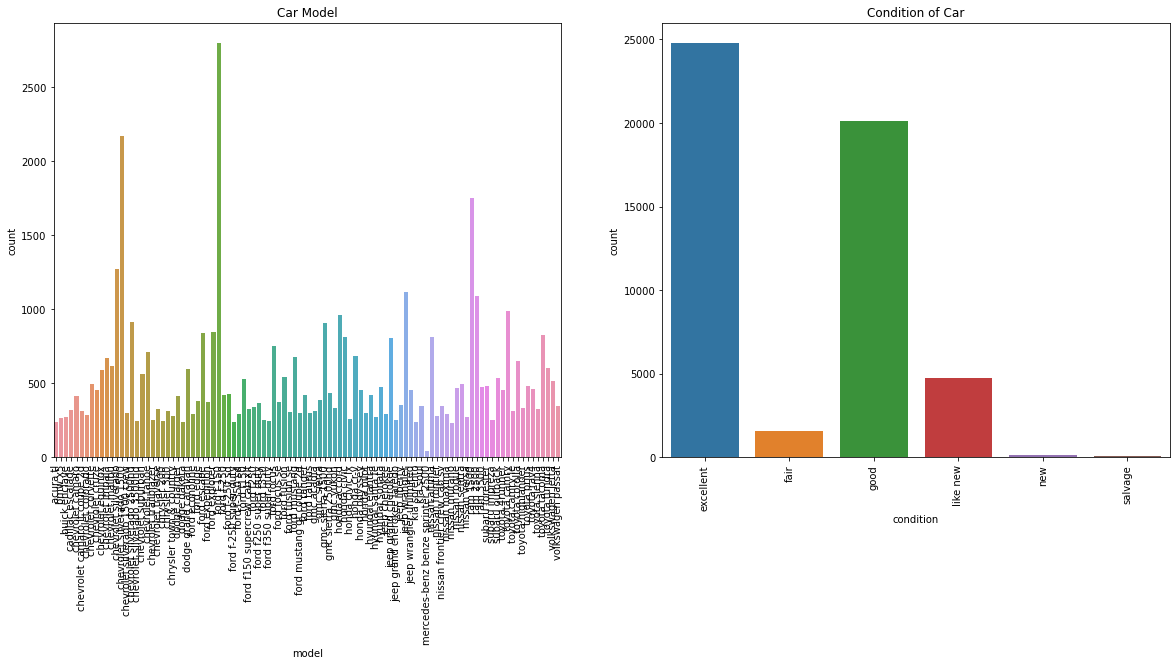

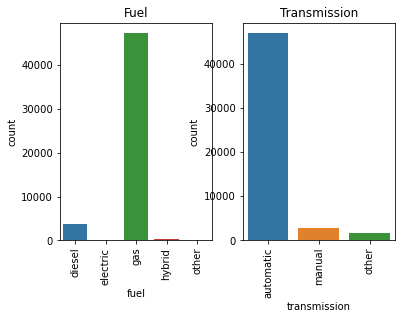

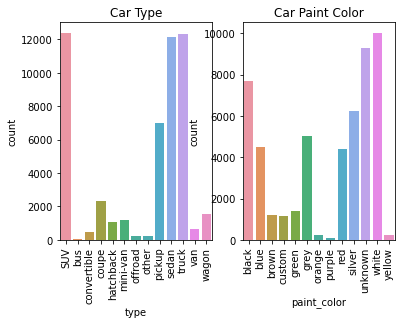

In [20]:
#checking repeats
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Model')
sns.countplot(df.model)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Condition of Car')
sns.countplot(df.condition)
plt.xticks(rotation=90)

plt.show()

plt.subplot(1,2,1)
plt.title('Fuel')
sns.countplot(df.fuel)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Transmission')
sns.countplot(df.transmission)
plt.xticks(rotation=90)

plt.show()

plt.subplot(1,2,1)
plt.title('Car Type')
sns.countplot(df.type)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Car Paint Color')
sns.countplot(df.paint_color)
plt.xticks(rotation=90)

plt.show()

In [21]:
#checking duplicates
print(df.duplicated().sum())

0


## Enrich data

In [22]:
# Add datetime values for when the ad was placed
df['Year'] = df['date_posted'].dt.year
df['Month'] = df['date_posted'].dt.month
df['Day'] = df['date_posted'].dt.day

In [23]:
# Add the vehicle's age when the ad was placed
df["vehicle_age"] = (df["Year"] - df["model_year"]).astype(int) + 1

In [24]:
# Add the vehicle's average mileage per year
df["avg_mileage"] = df["odometer"] / df["vehicle_age"]

In [25]:
df['condition'].dtype

CategoricalDtype(categories=['excellent', 'fair', 'good', 'like new', 'new', 'salvage'], ordered=False)

In [26]:
df['condition'] = df['condition'].replace(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'], ['5', '4', '3', '2', '1', '0'])

In [27]:
df['condition'] = df['condition'].astype(int)

## Check clean data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  category      
 3   condition     51525 non-null  int32         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  category      
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  category      
 8   type          51525 non-null  category      
 9   paint_color   51525 non-null  category      
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  Year          51525 non-null  int64         
 14  Month         51525 non-null  int64         
 15  Day           51525 non-null  int64 

In [29]:
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Year,Month,Day,vehicle_age,avg_mileage
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,8,18125.000000
1,25500,2011,ford f-150,3,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,8,11088.125000
2,5500,2013,hyundai sonata,2,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,7,15714.285714
3,1500,2003,ford f-150,4,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,17,10683.117647
4,14900,2017,chrysler 200,5,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,3,26967.666667


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

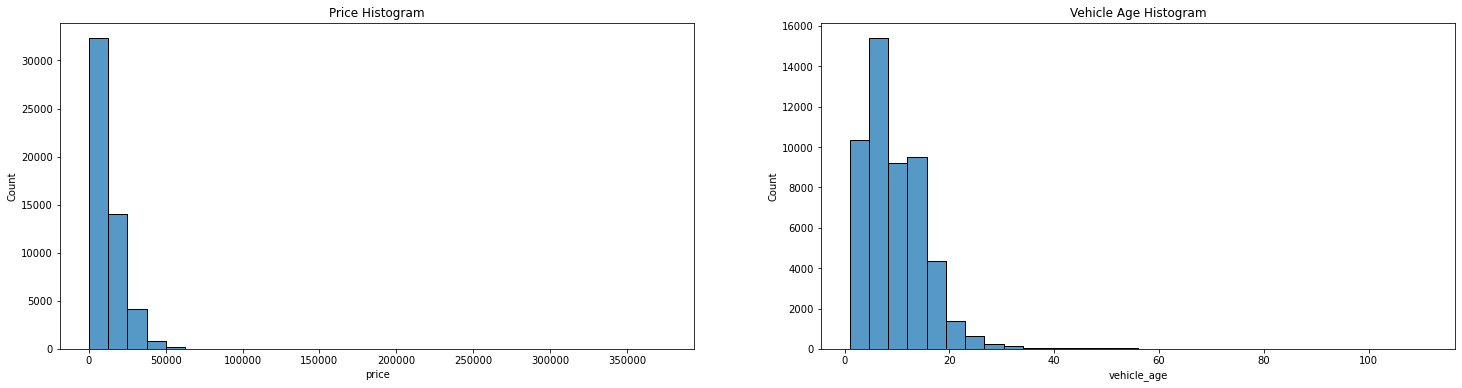

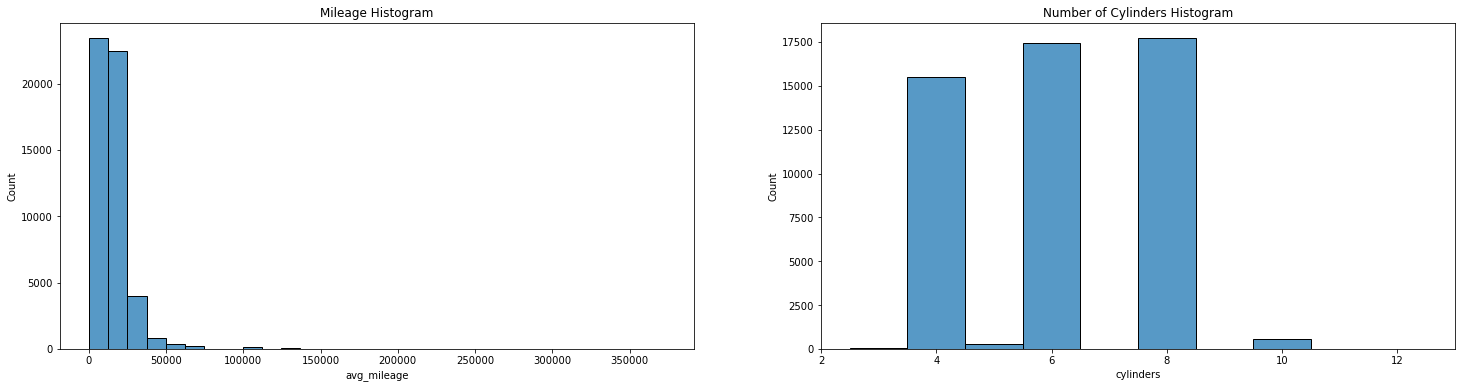

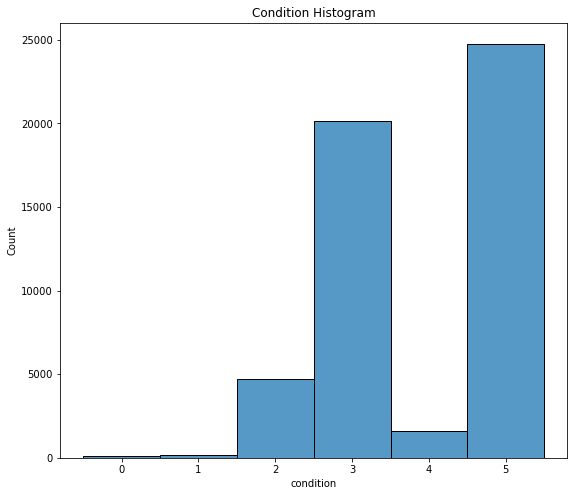

In [30]:
#Histograms of Price, Vehicle's Age, Mileage, Number of Cylinders, and Condition
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Price Histogram')
sns.histplot(data=df, x='price', bins=30)

plt.subplot(1,2,2)
plt.title('Vehicle Age Histogram')
sns.histplot(data=df, x='vehicle_age', bins=30)

plt.show()

plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Mileage Histogram')
sns.histplot(data=df, x='avg_mileage', bins=30)

plt.subplot(1,2,2)
plt.title('Number of Cylinders Histogram')
sns.histplot(data=df, x='cylinders', stat="count", discrete=True)

plt.show()

plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Condition Histogram')
sns.histplot(data=df, x='condition', stat="count", discrete=True)

plt.show()

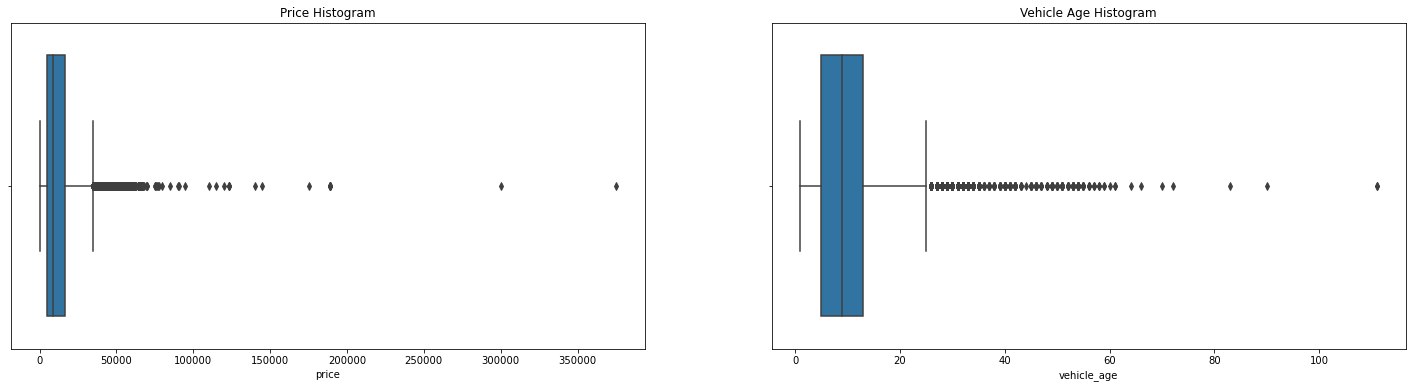

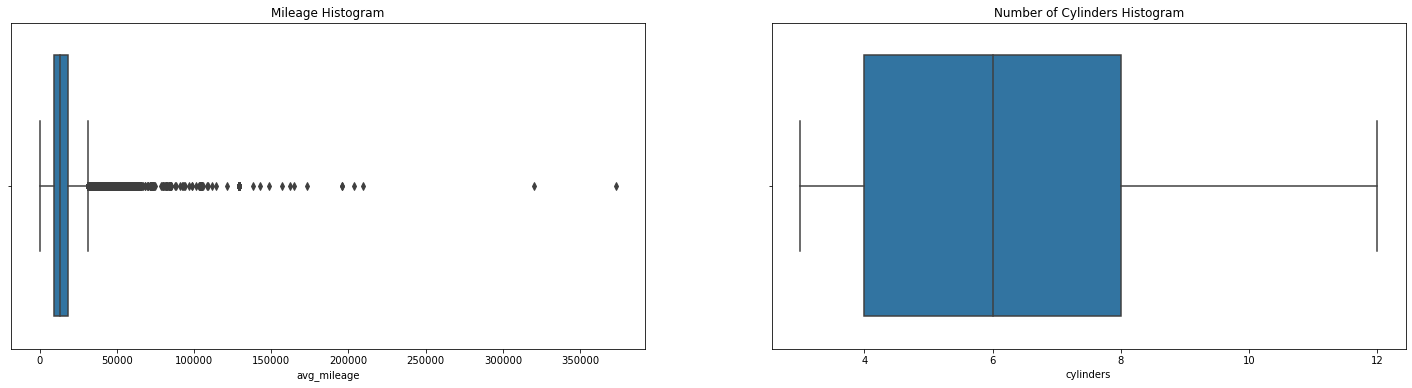

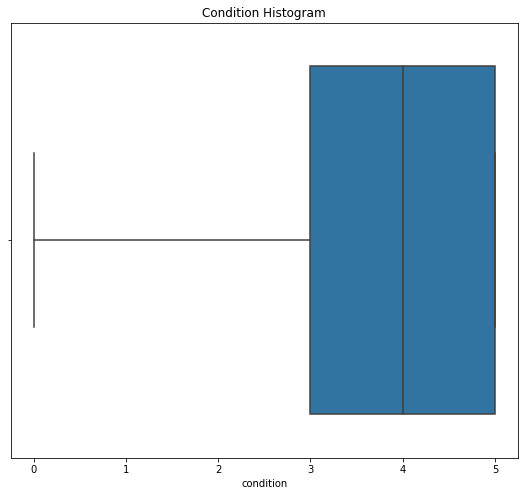

In [31]:
#Box Plot of Price, Vehicle's Age, Mileage, Number of Cylinders, and Condition
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Price Histogram')
sns.boxplot(data=df, x='price')

plt.subplot(1,2,2)
plt.title('Vehicle Age Histogram')
sns.boxplot(data=df, x='vehicle_age')

plt.show()

plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Mileage Histogram')
sns.boxplot(data=df, x='avg_mileage')

plt.subplot(1,2,2)
plt.title('Number of Cylinders Histogram')
sns.boxplot(data=df, x='cylinders')

plt.show()

plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Condition Histogram')
sns.boxplot(data=df, x='condition')

plt.show()

## Study and treat outliers

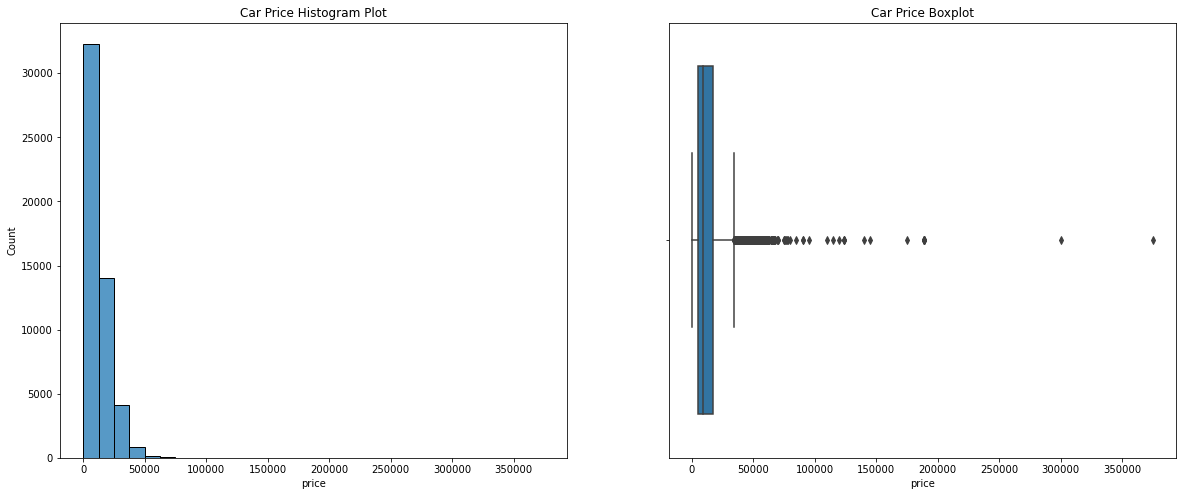

In [32]:
#Checking for the outliers in 'Price'
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Histogram Plot')
sns.histplot(df.price, bins=30)

plt.subplot(1,2,2)
plt.title('Car Price Boxplot')
sns.boxplot(x=df.price)

plt.show()

In [33]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [34]:
#treating missing values using IQR in a loop
def upper_lower_limit(column, df):

        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1

        lim_inf = q1 - 1.5 * IQR
        lim_sup = q3 + 1.5 * IQR

        #filter outliers
        df_filtered = df[(df[column] >= lim_inf) & (df[column] <= lim_sup)]
        return df_filtered
# implement the loop statement that recursively filters values out
new_vehicles_data = df.copy()
for col in ['price', 'vehicle_age', 'avg_mileage', 'days_listed']:
    new_vehicles_data = upper_lower_limit(col, new_vehicles_data)

In [35]:
new_vehicles_data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,Year,Month,Day,vehicle_age,avg_mileage
count,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000,45019.000000
mean,10835.011262,2009.613830,3.892601,6.070148,116683.790888,36.654390,2018.314178,6.584864,15.438793,9.700349,13459.749332
std,7662.307293,4.991239,1.124109,1.650478,58158.928986,23.155694,0.464193,3.483370,8.727630,4.995372,6058.673833
min,1.000000,1994.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000
25%,4995.000000,2006.000000,3.000000,4.000000,79187.500000,18.000000,2018.000000,3.000000,8.000000,6.000000,9317.500000
50%,8600.000000,2010.000000,4.000000,6.000000,113419.000000,32.000000,2018.000000,7.000000,15.000000,9.000000,12827.250000
75%,14999.000000,2013.000000,5.000000,8.000000,150000.000000,51.000000,2019.000000,10.000000,23.000000,13.000000,17125.000000
max,34595.000000,2019.000000,5.000000,12.000000,527835.000000,104.000000,2019.000000,12.000000,31.000000,25.000000,31125.000000


## Study core parameters without outliers

### Price (before and after treating for outliers)

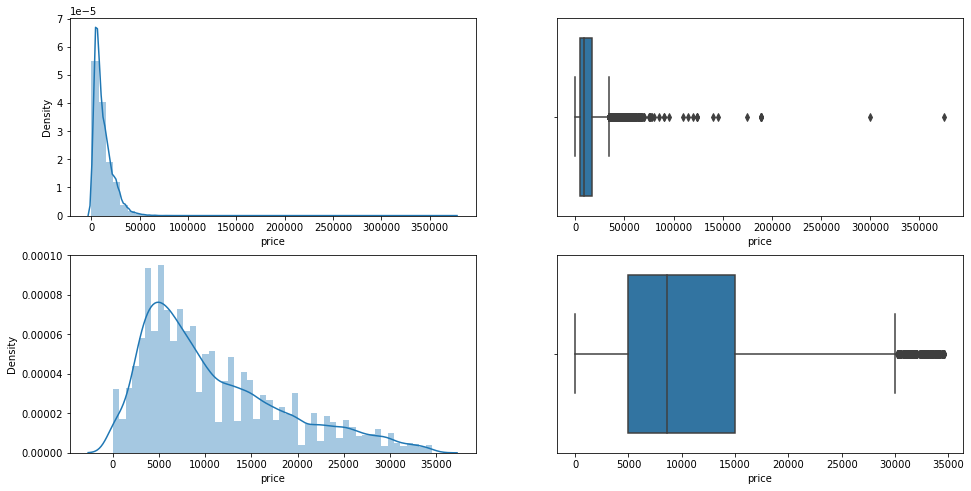

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.subplot(2,2,3)
sns.distplot(new_vehicles_data['price'])
plt.subplot(2,2,4)
sns.boxplot(new_vehicles_data['price'])
plt.show()

### Vehicle Age (before and after treating for outliers)

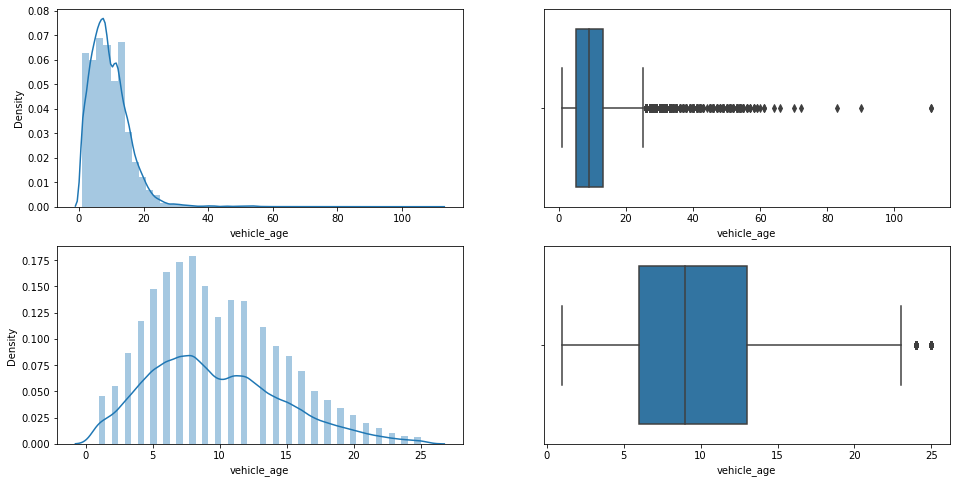

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['vehicle_age'])
plt.subplot(2,2,2)
sns.boxplot(df['vehicle_age'])
plt.subplot(2,2,3)
sns.distplot(new_vehicles_data['vehicle_age'])
plt.subplot(2,2,4)
sns.boxplot(new_vehicles_data['vehicle_age'])
plt.show()

### Mileage (before and after treating for outliers)

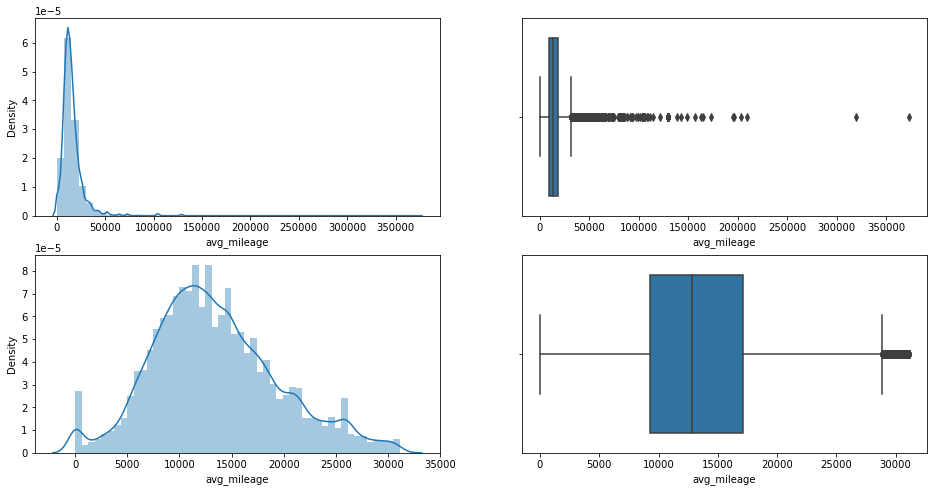

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['avg_mileage'])
plt.subplot(2,2,2)
sns.boxplot(df['avg_mileage'])
plt.subplot(2,2,3)
sns.distplot(new_vehicles_data['avg_mileage'])
plt.subplot(2,2,4)
sns.boxplot(new_vehicles_data['avg_mileage'])
plt.show()

## Ads lifetime

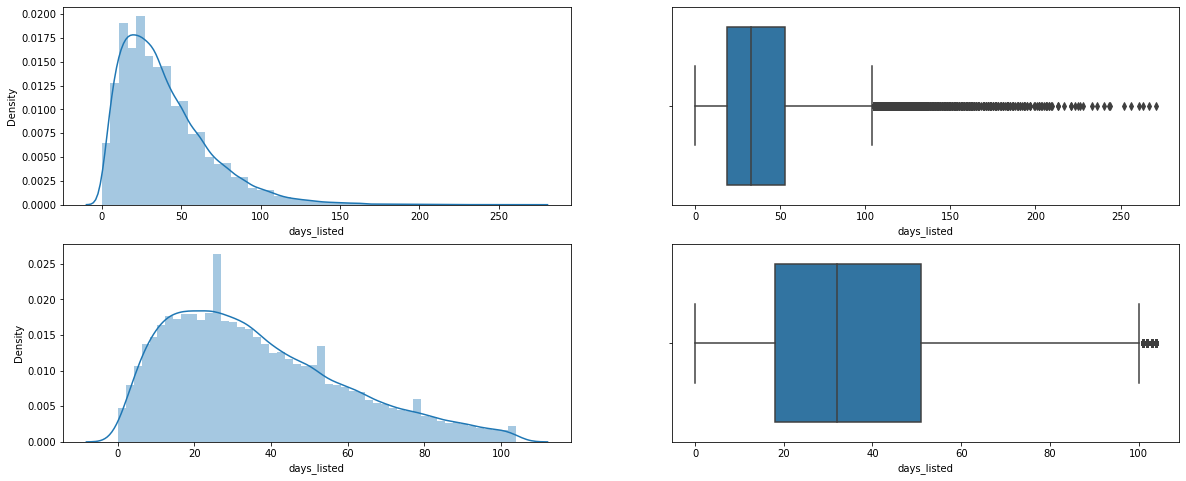

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.distplot(df['days_listed'])
plt.subplot(2,2,2)
sns.boxplot(df['days_listed'])
plt.subplot(2,2,3)
sns.distplot(new_vehicles_data['days_listed'])
plt.subplot(2,2,4)
sns.boxplot(new_vehicles_data['days_listed'])
plt.show()

## Average price per each type of vehicle

In [40]:
vehicle_type = pd.pivot_table(new_vehicles_data, index='type', values='price', aggfunc='mean').reset_index()
vehicle_type

,type,price
0,SUV,10180.054877
1,bus,17445.913043
2,convertible,12794.763473
3,coupe,13005.925318
4,hatchback,6634.398528
5,mini-van,7640.840691
6,offroad,14216.358382
7,other,9963.160550
8,pickup,14377.912307
9,sedan,6718.436811


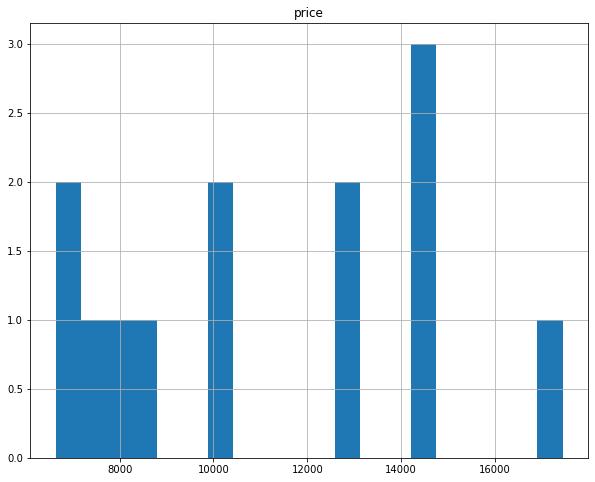

In [41]:
vehicle_type.hist(bins=20, figsize=(10, 8))
plt.show()

In [42]:
vehicle_ads = pd.pivot_table(new_vehicles_data, index='type', values='days_listed', aggfunc='count')
vehicle_ads.sort_values(by='days_listed')

,days_listed
type,
bus,23
offroad,173
other,218
convertible,334
van,526
hatchback,951
mini-van,1042
wagon,1425
coupe,1888


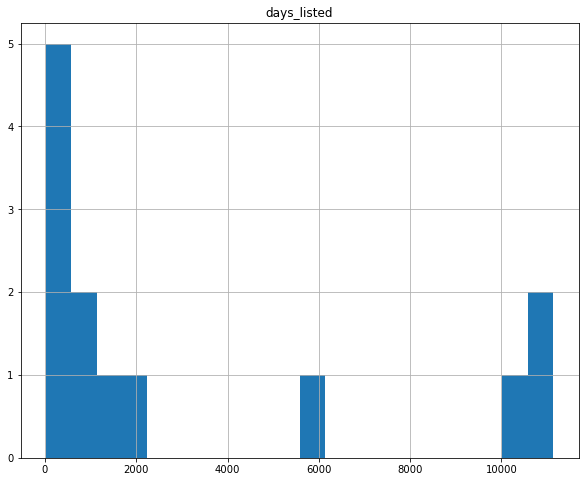

In [43]:
vehicle_ads.hist(bins=20, figsize=(10, 8))
plt.show()

## Price factors

In [44]:
vehicle_color = pd.pivot_table(new_vehicles_data, index='paint_color', values='days_listed', aggfunc='count')
vehicle_color

,days_listed
paint_color,
black,6641
blue,3988
brown,1109
custom,1041
green,1290
grey,4465
orange,203
purple,93
red,3873


In [45]:
vehicle_color = pd.pivot_table(new_vehicles_data, index='transmission', values='days_listed', aggfunc='count')
vehicle_color

,days_listed
transmission,
automatic,41113
manual,2404
other,1502


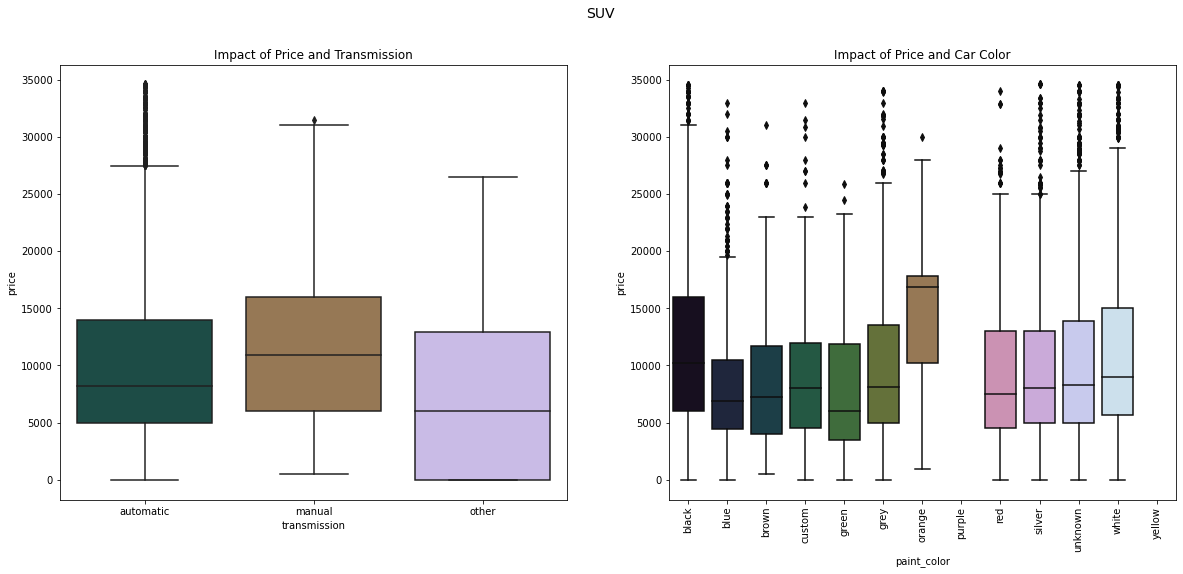

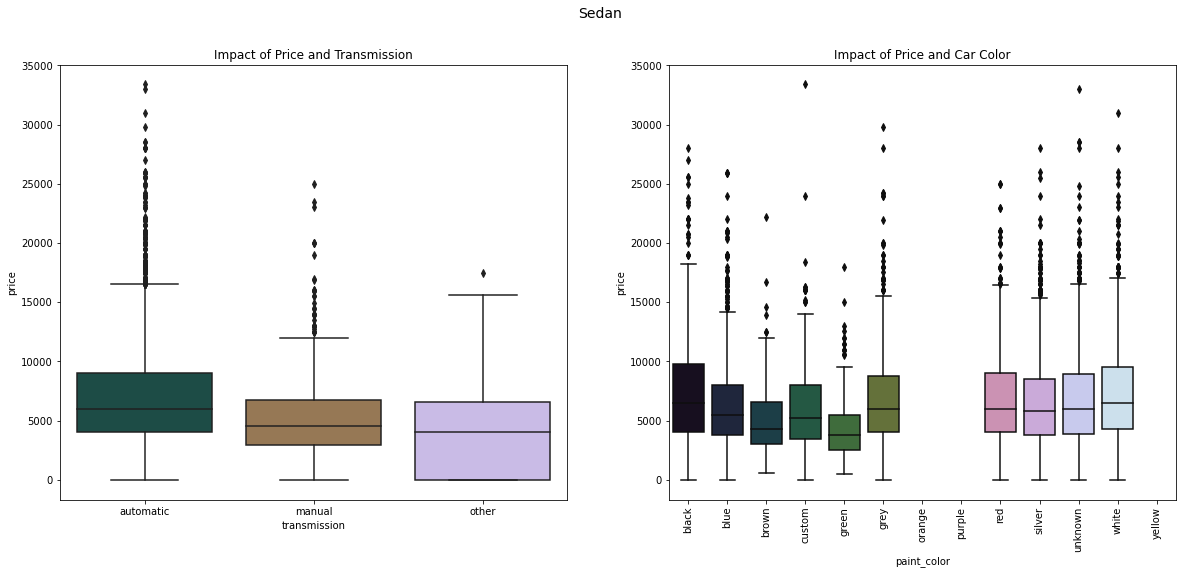

In [46]:
    #Get the filtered dataframe of the 2 highest vehicle_type
    df_suv = new_vehicles_data[new_vehicles_data['type'] == 'SUV']
    df_sedan = new_vehicles_data[new_vehicles_data['type'] == 'sedan']

    #Categorical Variables 
    plt.figure(figsize=(20,8))

    #============== Plot for SUV (1st Highest No. of Ads)

    # filter categorical values less than 50 values for paint and transmission
    df_suv_filter = df_suv[df_suv['paint_color'].map(df_suv['paint_color'].value_counts()> 50) ]
    df_suv_filter = df_suv_filter[df_suv_filter['transmission'].map(df_suv_filter['transmission'].value_counts()> 50)]


    plt.subplot(1,2,1)
    plt.suptitle("SUV", fontsize=14)
    plt.title('Impact of Price and Transmission')
    sns.boxplot(x=df_suv_filter['transmission'], y=df_suv_filter['price'], palette=("cubehelix"))

    plt.subplot(1,2,2)
    plt.title('Impact of Price and Car Color')
    sns.boxplot(x=df_suv_filter['paint_color'], y=df_suv_filter['price'], palette=("cubehelix"))
    plt.xticks(rotation=90)

    plt.show()


    #=============== Plot for Sedan (2nd Highest No. of Ads)

    # filter categorical values less than 50 values for paint and transmission
    df_sedan_filter = df_sedan[df_sedan['paint_color'].map(df_sedan['paint_color'].value_counts()> 50)]
    df_sedan_filter = df_sedan_filter[df_sedan_filter['transmission'].map(df_sedan_filter['transmission'].value_counts()> 50)]


    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.suptitle("Sedan", fontsize=14)
    plt.title('Impact of Price and Transmission')
    sns.boxplot(x=df_sedan_filter['transmission'], y=df_sedan_filter['price'], palette=("cubehelix"))

    plt.subplot(1,2,2)
    plt.title('Impact of Price and Car Color')
    sns.boxplot(x=df_sedan_filter['paint_color'], y=df_sedan_filter['price'], palette=("cubehelix"))
    plt.xticks(rotation=90)

    plt.show()

In [47]:
vehicle_color = pd.pivot_table(new_vehicles_data, index='paint_color', values='days_listed', aggfunc='count')
vehicle_color

,days_listed
paint_color,
black,6641
blue,3988
brown,1109
custom,1041
green,1290
grey,4465
orange,203
purple,93
red,3873


In [48]:
vehicle_color = pd.pivot_table(new_vehicles_data, index='transmission', values='days_listed', aggfunc='count')
vehicle_color

,days_listed
transmission,
automatic,41113
manual,2404
other,1502


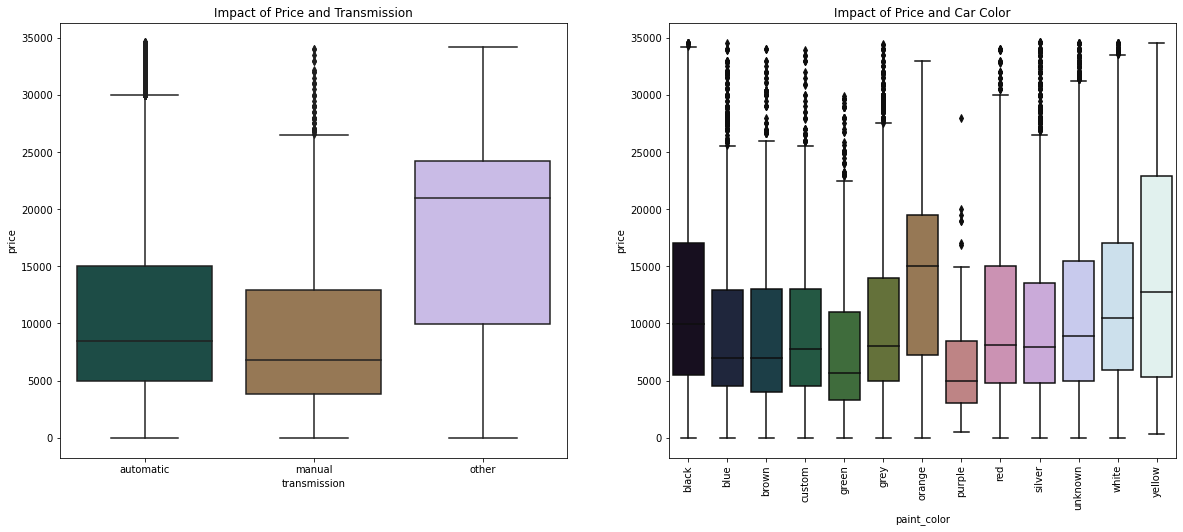

In [49]:
#Categorical Variables 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Impact of Price and Transmission')
sns.boxplot(x=new_vehicles_data['transmission'], y=new_vehicles_data['price'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Impact of Price and Car Color')
sns.boxplot(x=new_vehicles_data['paint_color'], y=new_vehicles_data['price'], palette=("cubehelix"))
plt.xticks(rotation=90)

plt.show()

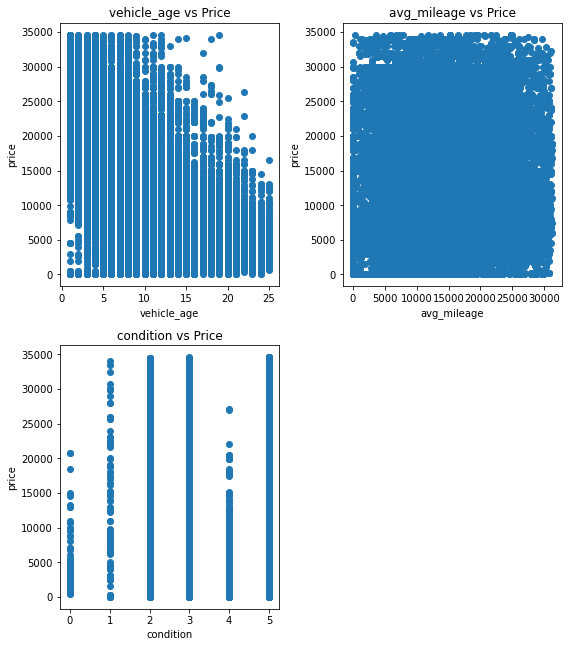

In [50]:
#Comparison of Price to Vehicle Age, Mileage and Condition
def scatter(x,fig):
    plt.subplot(9,2,fig)
    plt.scatter(new_vehicles_data[x], new_vehicles_data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(8, 40))

scatter('vehicle_age', 1)
scatter('avg_mileage', 2)
scatter('condition', 3)

plt.tight_layout()

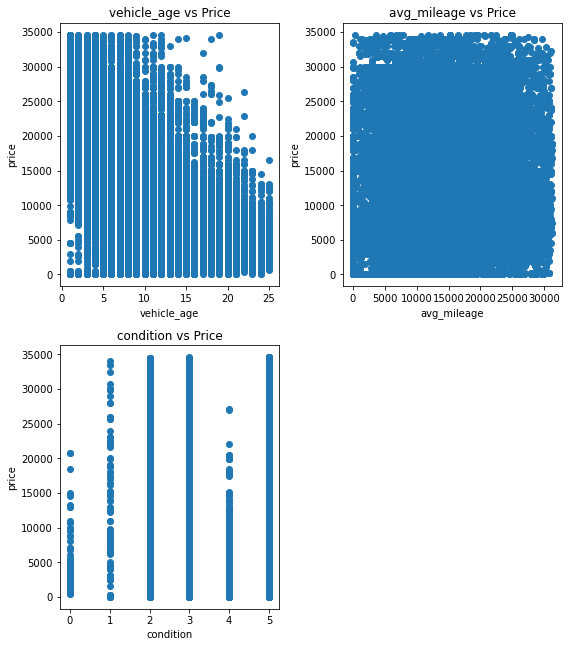

In [51]:
#Comparison of Price to Vehicle Age, Mileage and Condition
def scatter(x,fig):
    plt.subplot(9,2,fig)
    plt.scatter(new_vehicles_data[x], new_vehicles_data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(8, 40))

scatter('vehicle_age', 1)
scatter('avg_mileage', 2)
scatter('condition', 3)

plt.tight_layout()

In [52]:
new_vehicles_data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,Year,Month,Day,vehicle_age,avg_mileage
price,1.000000,0.507182,0.017375,0.306796,-0.425533,0.330708,0.000312,0.016971,-0.019014,-0.003107,-0.505186,0.128790
model_year,0.507182,1.000000,0.073025,-0.163569,-0.565950,-0.022190,-0.000239,0.037593,-0.036229,-0.001402,-0.995679,0.450073
condition,0.017375,0.073025,1.000000,-0.023141,-0.054170,0.040466,0.002803,-0.006298,0.008554,-0.006981,-0.073550,0.031747
cylinders,0.306796,-0.163569,-0.023141,1.000000,0.119065,0.411456,-0.000074,-0.003078,0.003841,-0.005027,0.163148,-0.040563
odometer,-0.425533,-0.565950,-0.054170,0.119065,1.000000,0.056996,0.000450,-0.010368,0.015037,-0.003024,0.564518,0.344966
is_4wd,0.330708,-0.022190,0.040466,0.411456,0.056996,1.000000,0.003501,-0.003176,0.004911,-0.001109,0.021877,0.047641
days_listed,0.000312,-0.000239,0.002803,-0.000074,0.000450,0.003501,1.000000,0.006940,-0.007542,-0.006396,0.000884,-0.002519
Year,0.016971,0.037593,-0.006298,-0.003078,-0.010368,-0.003176,0.006940,1.000000,-0.820313,-0.062859,0.055363,-0.096159
Month,-0.019014,-0.036229,0.008554,0.003841,0.015037,0.004911,-0.007542,-0.820313,1.000000,0.031673,-0.040029,0.079612
Day,-0.003107,-0.001402,-0.006981,-0.005027,-0.003024,-0.001109,-0.006396,-0.062859,0.031673,1.000000,-0.004440,0.004893


========================= SUV =========================


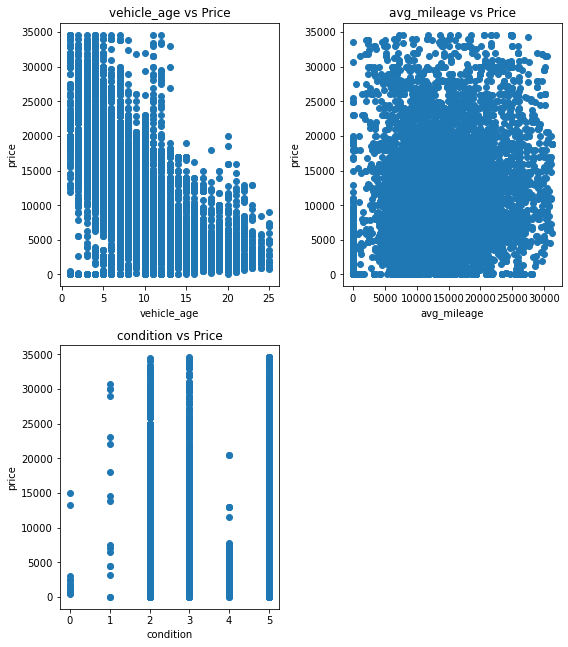

In [53]:
#Comparison of Price to Vehicle Age, Mileage and Condition
# ================ SUV =======================
def scatter(x,fig):
    plt.subplot(9,2,fig)
    plt.scatter(df_suv[x], df_suv['price'])
    plt.title(x+' vs Price')
    plt.ylabel('price')
    plt.xlabel(x)
    
plt.figure(figsize=(8, 40))
    
print("="*25, "SUV", "="*25)
scatter('vehicle_age', 1)
scatter('avg_mileage', 2)
scatter('condition', 3)

plt.tight_layout()
plt.show()

========================= Sedan =========================


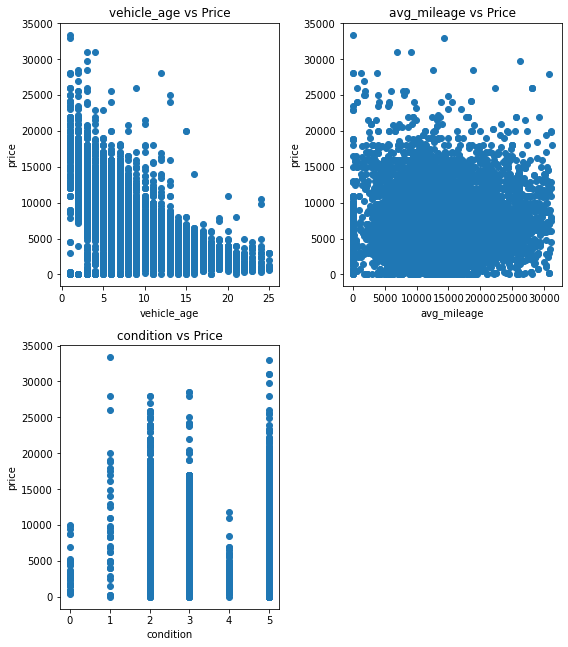

In [54]:
# ================ Sedan =======================
def scatter(x,fig):
    plt.subplot(9,2,fig)
    plt.scatter(df_sedan[x], df_sedan['price'])
    plt.title(x+' vs Price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(8, 40))

print("="*25, "Sedan", "="*25)
scatter('vehicle_age', 1)
scatter('avg_mileage', 2)
scatter('condition', 3)

plt.tight_layout()
plt.show()